In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('states.csv')  # Make sure this file is in the same folder
df.head()

,State,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Marketplace Tax Credits (2016),Average Monthly Tax Credit (2016),State Medicaid Expansion (2016),Medicaid Enrollment (2013),Medicaid Enrollment (2016),Medicaid Enrollment Change (2013-2016),Medicare Enrollment (2016)
0,Alabama,14.6%,10.1%,-4.5%,215000,2545000,165534,152206,$310,False,799176.0,910775,111599.0,989855
1,Alaska,19.9%,14.9%,-5%,36000,390000,17995,16205,$750,True,122334.0,166625,44291.0,88966
2,Arizona,16.9%,10.8%,-6.1%,410000,3288000,179445,124346,$230,True,1201770.0,1716198,514428.0,1175624
3,Arkansas,17.5%,9.5%,-8%,234000,1365000,63357,56843,$306,True,556851.0,920194,363343.0,606146
4,California,18.5%,8.6%,-9.9%,3826000,19552000,1415428,1239893,$309,True,7755381.0,11843081,4087700.0,5829777



This code will create a bar chart comparing the uninsured rates for all states between 2010 and 2015, sorted by the 2010 rates in descending order. The visualization will help you easily identify which states had the highest rates in 2010 and how those rates changed by 2015.

# User
provide me a code that compares the uninsured rate (2010) with uninsured (2015) for all states using the states.csv file found in the same folder

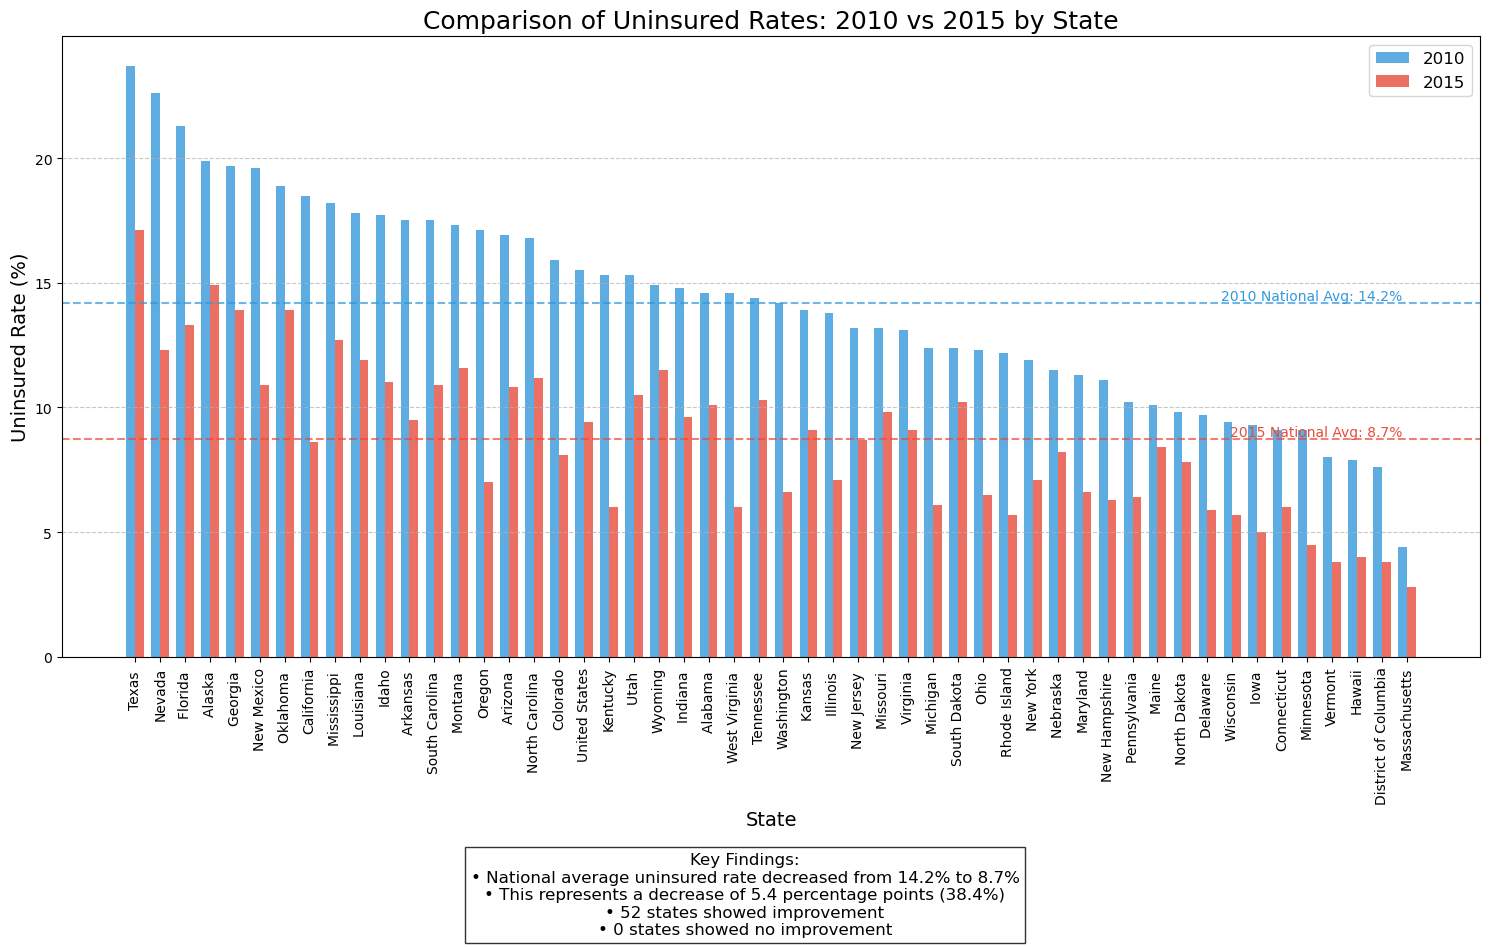

States with Highest Uninsured Rates in 2010:
          Uninsured Rate (2010)  Uninsured Rate (2015)
State                                                 
Texas                      23.7                   17.1
Nevada                     22.6                   12.3
Florida                    21.3                   13.3
Alaska                     19.9                   14.9
Georgia                    19.7                   13.9

States with Highest Uninsured Rates in 2015:
           Uninsured Rate (2010)  Uninsured Rate (2015)
State                                                  
Texas                       23.7                   17.1
Alaska                      19.9                   14.9
Georgia                     19.7                   13.9
Oklahoma                    18.9                   13.9
Florida                     21.3                   13.3

States with Largest Decreases in Uninsured Rate:
            Uninsured Rate (2010)  Uninsured Rate (2015)  Change
State            

In [36]:
# Assistant
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data from states.csv
df = pd.read_csv('states.csv')

# Convert both columns to numeric values, removing any '%' signs if present
df['Uninsured Rate (2010)'] = pd.to_numeric(df['Uninsured Rate (2010)'].str.replace('%', ''), errors='coerce')
df['Uninsured Rate (2015)'] = pd.to_numeric(df['Uninsured Rate (2015)'].str.replace('%', ''), errors='coerce')

# Calculate mean uninsured rates by state for both years
state_rates = df.groupby('State')[['Uninsured Rate (2010)', 'Uninsured Rate (2015)']].mean()

# Sort by 2010 rates for better visualization
state_rates = state_rates.sort_values('Uninsured Rate (2010)', ascending=False)

# Create a figure with appropriate size
plt.figure(figsize=(15, 10))

# Set the width of the bars
bar_width = 0.35
index = np.arange(len(state_rates.index))

# Create the bar chart
bar1 = plt.bar(index, state_rates['Uninsured Rate (2010)'], bar_width, 
               label='2010', color='#3498db', alpha=0.8)
bar2 = plt.bar(index + bar_width, state_rates['Uninsured Rate (2015)'], bar_width,
               label='2015', color='#e74c3c', alpha=0.8)

# Add labels and title
plt.title("Comparison of Uninsured Rates: 2010 vs 2015 by State", fontsize=18)
plt.xlabel("State", fontsize=14)
plt.ylabel("Uninsured Rate (%)", fontsize=14)
plt.xticks(index + bar_width/2, state_rates.index, rotation=90, fontsize=10)
plt.legend(fontsize=12)

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Calculate national averages
nat_avg_2010 = state_rates['Uninsured Rate (2010)'].mean()
nat_avg_2015 = state_rates['Uninsured Rate (2015)'].mean()

# Add horizontal lines for national averages
plt.axhline(y=nat_avg_2010, color='#3498db', linestyle='--', alpha=0.7)
plt.axhline(y=nat_avg_2015, color='#e74c3c', linestyle='--', alpha=0.7)

# Add text annotations for national averages
plt.text(len(state_rates)-1, nat_avg_2010, f'2010 National Avg: {nat_avg_2010:.1f}%', 
         fontsize=10, va='bottom', ha='right', color='#3498db')
plt.text(len(state_rates)-1, nat_avg_2015, f'2015 National Avg: {nat_avg_2015:.1f}%', 
         fontsize=10, va='bottom', ha='right', color='#e74c3c')

# Calculate the average change
avg_change = (nat_avg_2015 - nat_avg_2010)
pct_change = (avg_change / nat_avg_2010) * 100

# Add summary statistics as text
summary_text = (
    f"Key Findings:\n"
    f"• National average uninsured rate decreased from {nat_avg_2010:.1f}% to {nat_avg_2015:.1f}%\n"
    f"• This represents a decrease of {abs(avg_change):.1f} percentage points ({abs(pct_change):.1f}%)\n"
    f"• {sum(state_rates['Uninsured Rate (2015)'] < state_rates['Uninsured Rate (2010)'])} states showed improvement\n"
    f"• {sum(state_rates['Uninsured Rate (2015)'] >= state_rates['Uninsured Rate (2010)'])} states showed no improvement"
)

plt.figtext(0.5, 0.01, summary_text, ha="center", fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

# Adjust layout to make room for all elements
plt.tight_layout(rect=[0, 0.1, 1, 0.95])

# Display the plot
plt.show()

# Print additional statistics
print("States with Highest Uninsured Rates in 2010:")
print(state_rates.nlargest(5, 'Uninsured Rate (2010)')[['Uninsured Rate (2010)', 'Uninsured Rate (2015)']])

print("\nStates with Highest Uninsured Rates in 2015:")
print(state_rates.nlargest(5, 'Uninsured Rate (2015)')[['Uninsured Rate (2010)', 'Uninsured Rate (2015)']])

print("\nStates with Largest Decreases in Uninsured Rate:")
state_rates['Change'] = state_rates['Uninsured Rate (2015)'] - state_rates['Uninsured Rate (2010)']
print(state_rates.nsmallest(5, 'Change')[['Uninsured Rate (2010)', 'Uninsured Rate (2015)', 'Change']])

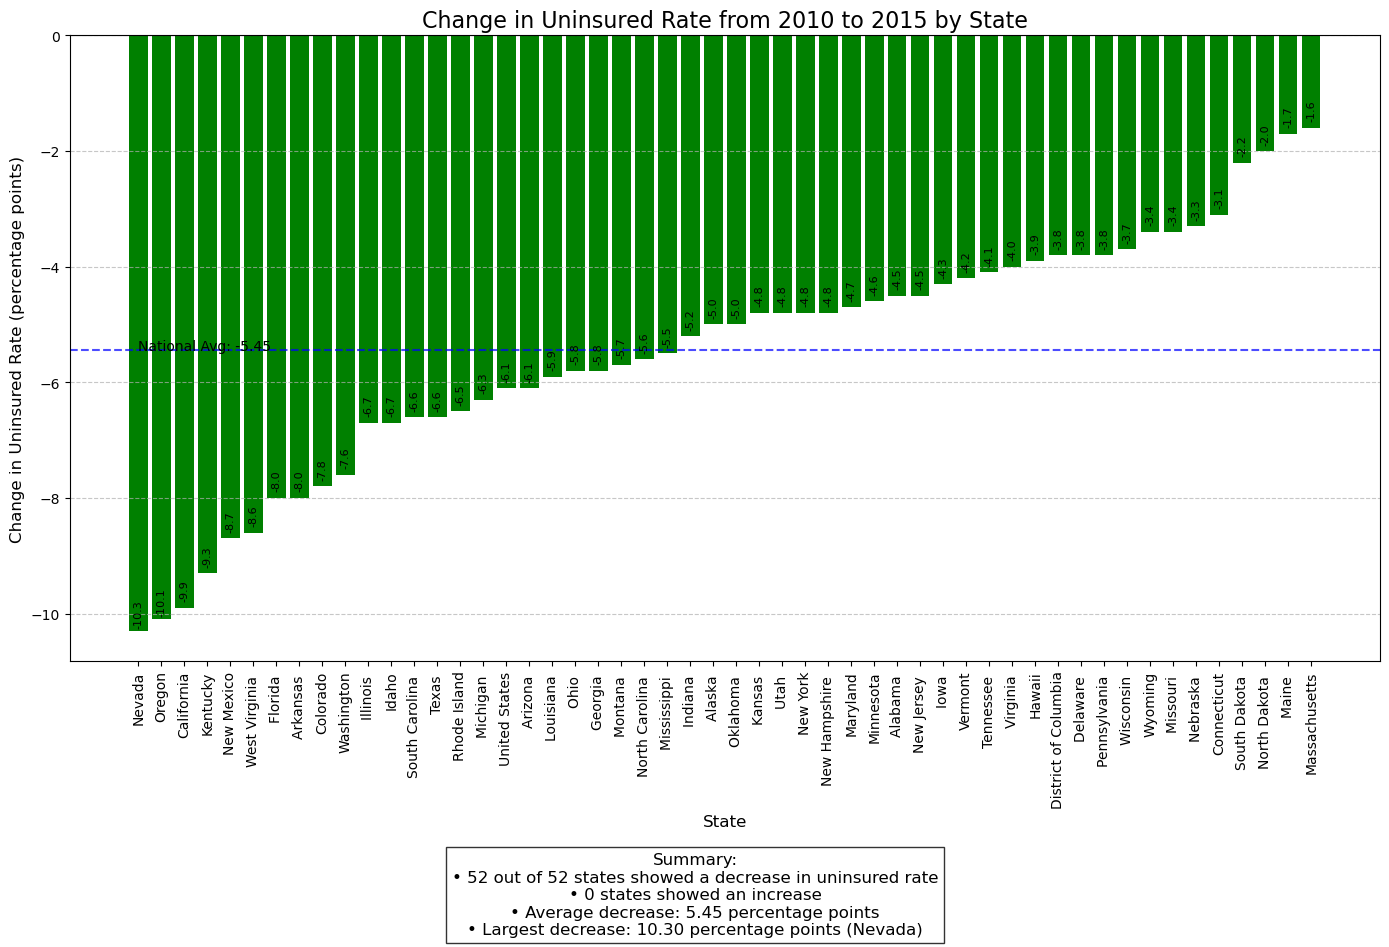

Detailed Statistics on Uninsured Rate Changes from 2010 to 2015:
National average change: -5.45 percentage points
States with decreased rates: 52 (100.0%)
States with increased rates: 0 (0.0%)

Top 5 States with Largest Decreases:
            Change  Percent Change
State                             
Nevada       -10.3      -45.575221
Oregon       -10.1      -59.064327
California    -9.9      -53.513514
Kentucky      -9.3      -60.784314
New Mexico    -8.7      -44.387755

Top 5 States with Largest Increases (or Smallest Decreases):
               Change  Percent Change
State                                
Massachusetts    -1.6      -36.363636
Maine            -1.7      -16.831683
North Dakota     -2.0      -20.408163
South Dakota     -2.2      -17.741935
Connecticut      -3.1      -34.065934


In [22]:
# Assistant
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data from states.csv
df = pd.read_csv('states.csv')

# Convert both columns to numeric values, removing any '%' signs if present
df['Uninsured Rate (2010)'] = pd.to_numeric(df['Uninsured Rate (2010)'].str.replace('%', ''), errors='coerce')
df['Uninsured Rate (2015)'] = pd.to_numeric(df['Uninsured Rate (2015)'].str.replace('%', ''), errors='coerce')

# Calculate mean uninsured rates by state for both years
state_rates = df.groupby('State')[['Uninsured Rate (2010)', 'Uninsured Rate (2015)']].mean()

# Calculate the change in uninsured rate (2015 - 2010)
state_rates['Change'] = state_rates['Uninsured Rate (2015)'] - state_rates['Uninsured Rate (2010)']

# Calculate percentage change
state_rates['Percent Change'] = (state_rates['Change'] / state_rates['Uninsured Rate (2010)']) * 100

# Sort by the magnitude of change
state_rates = state_rates.sort_values('Change')

# Create a figure with appropriate size
plt.figure(figsize=(14, 10))

# Create the bar chart for the change in uninsured rate
bars = plt.bar(state_rates.index, state_rates['Change'], 
       color=['green' if x < 0 else 'red' for x in state_rates['Change']])

# Add labels and title
plt.title("Change in Uninsured Rate from 2010 to 2015 by State", fontsize=16)
plt.xlabel("State", fontsize=12)
plt.ylabel("Change in Uninsured Rate (percentage points)", fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add a horizontal line at y=0
plt.axhline(y=0, color='black', linestyle='-', alpha=0.7)

# Calculate national average change
national_avg_change = state_rates['Change'].mean()
plt.axhline(y=national_avg_change, color='blue', linestyle='--', alpha=0.7)
plt.text(0, national_avg_change, f'National Avg: {national_avg_change:.2f}', fontsize=10)

# Add data labels to the bars
for bar in bars:
    height = bar.get_height()
    if np.isnan(height):
        continue
    plt.text(bar.get_x() + bar.get_width()/2., 
             height + (0.3 if height < 0 else -0.3),
             f'{height:.1f}',
             ha='center', va='center', rotation=90, 
             color='black', fontsize=8)

# Add summary statistics as text
total_states = len(state_rates)
states_decreased = sum(state_rates['Change'] < 0)
states_increased = sum(state_rates['Change'] > 0)
avg_decrease = state_rates[state_rates['Change'] < 0]['Change'].mean()
max_decrease = state_rates['Change'].min()
max_decrease_state = state_rates['Change'].idxmin()

summary_text = (
    f"Summary:\n"
    f"• {states_decreased} out of {total_states} states showed a decrease in uninsured rate\n"
    f"• {states_increased} states showed an increase\n"
    f"• Average decrease: {abs(avg_decrease):.2f} percentage points\n"
    f"• Largest decrease: {abs(max_decrease):.2f} percentage points ({max_decrease_state})"
)

plt.figtext(0.5, 0.01, summary_text, ha="center", fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

# Adjust layout to make room for all elements
plt.tight_layout(rect=[0, 0.1, 1, 0.95])

# Display the plot
plt.show()

# Print detailed statistics
print("Detailed Statistics on Uninsured Rate Changes from 2010 to 2015:")
print(f"National average change: {national_avg_change:.2f} percentage points")
print(f"States with decreased rates: {states_decreased} ({(states_decreased/total_states)*100:.1f}%)")
print(f"States with increased rates: {states_increased} ({(states_increased/total_states)*100:.1f}%)")
print("\nTop 5 States with Largest Decreases:")
print(state_rates.nsmallest(5, 'Change')[['Change', 'Percent Change']])
print("\nTop 5 States with Largest Increases (or Smallest Decreases):")
print(state_rates.nlargest(5, 'Change')[['Change', 'Percent Change']])